<a href="https://colab.research.google.com/github/selenslmn/MNIST/blob/main/MNIST_by_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification on MNIST dataset by Logistic Regression**

#### *In this study, it was classified a given image of a handwritten digit with single-label multi-class logistic regression model in the neural network.*

I explained the necessary informations about the data set in [my article](https://salmanselen.medium.com/image-classification-on-mnist-dataset-by-logistic-regression-b159d62f3c06). In addition, I mentioned both the parameters of the model and image classification process. I recommend you to read before browsing the codes.



**1.**  **I downloaded data to Google Colab with API Token in Kaggle.**


In [ ]:
from google.colab import files
files.upload()

In [ ]:
!ls -lha kaggle.json

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d oddrationale/mnist-in-csv
!unzip mnist-in-csv.zip

-rw-r--r-- 1 root root 67 Dec 21 16:07 kaggle.json
 33% 5.00M/15.2M [00:00<00:00, 32.4MB/s]
100% 15.2M/15.2M [00:00<00:00, 62.9MB/s]
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [ ]:
import numpy as np

training_dataset = np.loadtxt('mnist_train.csv', delimiter=',', skiprows=1, dtype=np.uint8)
training_dataset_x = training_dataset[:, 1:]
training_dataset_y = training_dataset[:, 0]

test_dataset = np.loadtxt('mnist_test.csv', delimiter=',', skiprows=1, dtype=np.uint8)
test_dataset_x = test_dataset[:, 1:]
test_dataset_y = test_dataset[:, 0]

*   traning_dataset_x is a numpy array of 60000, each 28x28 matrix.
*   test_dataset_x is a numpy array of 10000, each 28x28 matrix.
*   training_dataset_y and test_dataset_y are numpy arrays of one-dimensional. Each element of these arrays consists of a categorical value from 0 to 9.

**2.**   **Let's show some pictures in the dataset.**



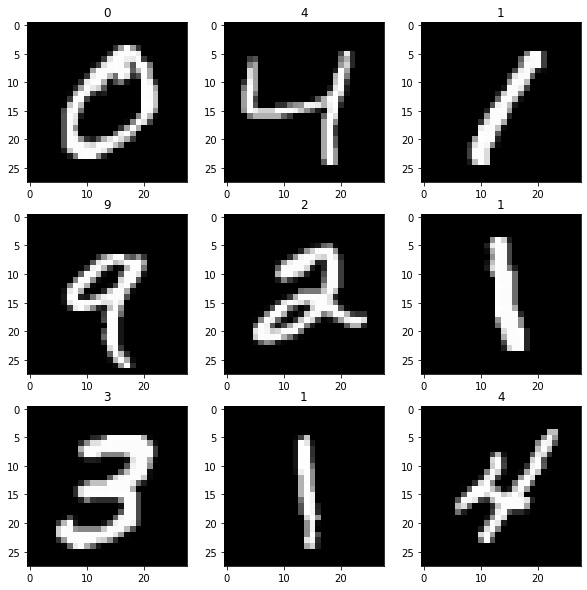

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches(10, 10)
for i in range(1, 10):
  plt.subplot(3, 3, i)
  axis = plt.gca()
  axis.set_title(str(training_dataset_y[i]))
  plt.imshow(training_dataset_x[i].reshape(28, 28), cmap='gray')
plt.show()

**3.**   **Shape the 28x28 three-dimensional image matrix to two-dimensional for input to the neural network.**

In [ ]:
training_dataset_x = training_dataset_x.reshape(-1, 28 * 28)
test_dataset_x = test_dataset_x.reshape(-1, 28 * 28)

**4.** **Normalize the data with the MinMax method. The scaling method is done by dividing the pixel values directly by 255, since the lowest pixel value is 0 and the largest pixel value is 255.**

In [ ]:
training_dataset_x = training_dataset_x / 255
test_dataset_x = test_dataset_x / 255

**5.** **Since the output of the model is a categorical data, we need to encode the data with one hot encoding before training. For one hot encoding, we can also use the OneHotEncoder object in the sklearn.preprocesing module. Used here with the to_categorical function in Keras.**

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical

training_dataset_y = to_categorical(training_dataset_y)
test_dataset_y = to_categorical(test_dataset_y)

**6.** **Now let's create our model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28 * 28, activation='relu', name='Hidden-1'))
model.add(Dense(256, activation='relu', name='Hidden-2'))
model.add(Dense(10, activation='softmax', name='Output'))
model.compile('adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
hist = model.fit(training_dataset_x, training_dataset_y, epochs=10, batch_size=64,
validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2188 - categorical_accuracy: 0.9333 - val_loss: 0.1279 - val_categorical_accuracy: 0.9608
Epoch 2/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0851 - categorical_accuracy: 0.9746 - val_loss: 0.0973 - val_categorical_accuracy: 0.9706
Epoch 3/10
750/750 [==============================] - 7s 10ms/step - loss: 0.0544 - categorical_accuracy: 0.9827 - val_loss: 0.0869 - val_categorical_accuracy: 0.9734
Epoch 4/10
750/750 [==============================] - 7s 10ms/step - loss: 0.0384 - categorical_accuracy: 0.9873 - val_loss: 0.0979 - val_categorical_accuracy: 0.9732
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0303 - categorical_accuracy: 0.9897 - val_loss: 0.0957 - val_categorical_accuracy: 0.9743
Epoch 6/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0265 - categorical_accuracy: 0.9912 - val_loss: 0.0854 - val_categorical_accuracy: 0.978

**7.** **Let's look at some graphics**

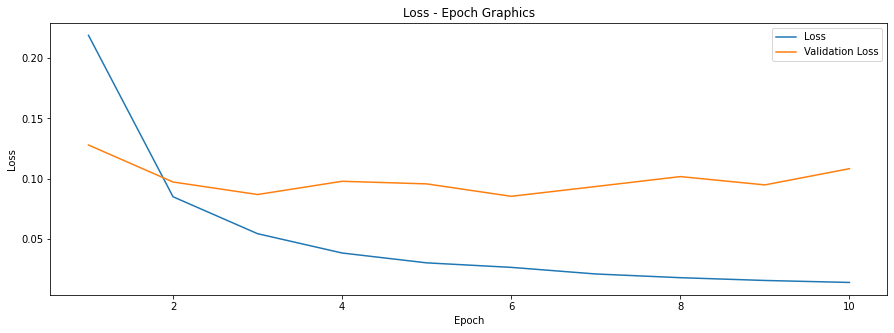

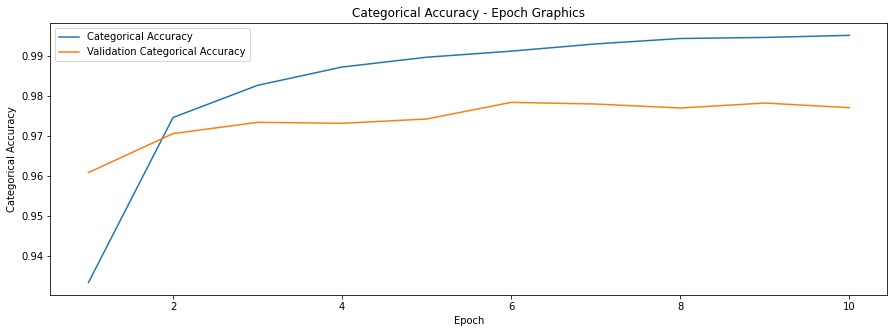

In [ ]:
import matplotlib.pyplot as plt

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Loss - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

figure = plt.gcf()
figure.set_size_inches((15, 5))
plt.title('Categorical Accuracy - Epoch Graphics')
plt.xlabel('Epoch')
plt.ylabel('Categorical Accuracy')
plt.plot(range(1, len(hist.history['categorical_accuracy']) + 1),
hist.history['categorical_accuracy'])
plt.plot(range(1, len(hist.history['val_categorical_accuracy']) + 1),
hist.history['val_categorical_accuracy'])
plt.legend(['Categorical Accuracy', 'Validation Categorical Accuracy'])
plt.show()

*   According to these graphs, as the number of epoch increases, "***overfit***" suspicion appears. That's why I changed my epoch count from 20 to 10.

**8.** **We have to test our model**



In [ ]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y)
for i in range(len(eval_result)):
  print(f'{model.metrics_names[i]} ---> {eval_result[i]}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0897 - categorical_accuracy: 0.9781
loss ---> 0.08969924598932266
categorical_accuracy ---> 0.9781000018119812


*   Looking at the "***categorical_accuracy***" value here, we can say that this model recognizes the entered number correctly with a probability of 97.8%. This value will increase when training on a higher dataset.

**9.** **Then I tested the 28x28 size picture I drew in the paint program on the model. Do you think the model guessed correctly?**

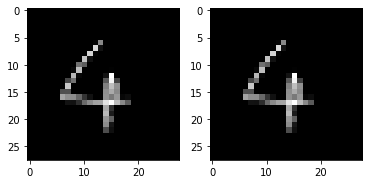

1/1 [==============================] - 0s 59ms/step
4


In [ ]:
img_data = plt.imread('digit.bmp')
gray_img_data = np.average(img_data, weights=[0.3, 0.59, 0.11], axis=2)
plt.subplot(1, 2, 1)
plt.imshow(img_data)
plt.subplot(1, 2, 2)
plt.imshow(gray_img_data, cmap='gray')
plt.show()

gray_img_data = gray_img_data / 255
gray_img_data = gray_img_data.reshape((1, 28 * 28))
predict_result = model.predict(gray_img_data)
number = np.argmax(predict_result[0])
print(number)

*   In this example, since we have already drawn the shape in black and white, there are no significant differences between the original image and the grayscale image.

